<a href="https://colab.research.google.com/github/QQH0828/Computer-Vision-and-Pattern-Recognition/blob/main/hadamard6_explain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Walsh Hadamard Transform
### Example 6
#### WHT Explanation
#### We're going to use very small size (4x4 , 8x8) gray-level images
#### in these tests

#### ----------===========----------

In [ ]:
# Libraries
import scipy as sc
import math as m
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#### Functions that we need to convert natural Hadamard
#### matrices to sequence ordered Hadamard matrices

In [ ]:
def show_img(img, img_label=None, do_display=True):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title(img_label)
    if do_display:
        plt.show()

FIGSIZE = (12, 8)

In [ ]:
def bit_reverse(n, bit_size):
    # Convert the integer to binary and remove the '0b' prefix
    binary = bin(n)[2:]
    # Pad the binary string with leading zeros to make it the specified bit size
    binary = binary.zfill(bit_size)
    # Reverse the binary string
    reversed_binary = binary[::-1]
    # Convert the reversed binary string back to an integer
    reversed_int = int(reversed_binary, 2)
    return reversed_int


In [ ]:
def binary_to_gray(n):
    # Convert binary to gray code using bitwise XOR
    gray = n ^ (n >> 1)
    return gray


In [ ]:
def gray_to_binary(n):
    binary = n
    shift = n
    while shift > 0:
        shift >>= 1
        binary ^= shift
    return binary

In [ ]:
def sordhad( H ):
    SS = H.shape
    H =  sc.linalg.hadamard( SS[0] )
    h = np.zeros(SS)
    for i in range(SS[0]):
        j = bit_reverse( i ,int(m.log2(SS[0])) )
        j = gray_to_binary(j)
        h[j,:] = H[i,:]

    return h


## Hadamard Transform
### Example 1: 4x4, a--> A  ,  A=h*a*h

In [ ]:
# This is our image:
a = np.array( [[1,1,1,0] , [1,1,1,0] , [0,0,0,1] , [0,0,0,1] ] )

In [ ]:
# making the Seq Ord Hadamard transform
SS = a.shape
h = sc.linalg.hadamard( SS[0] )
h = sordhad( h )

<Figure size 640x480 with 0 Axes>

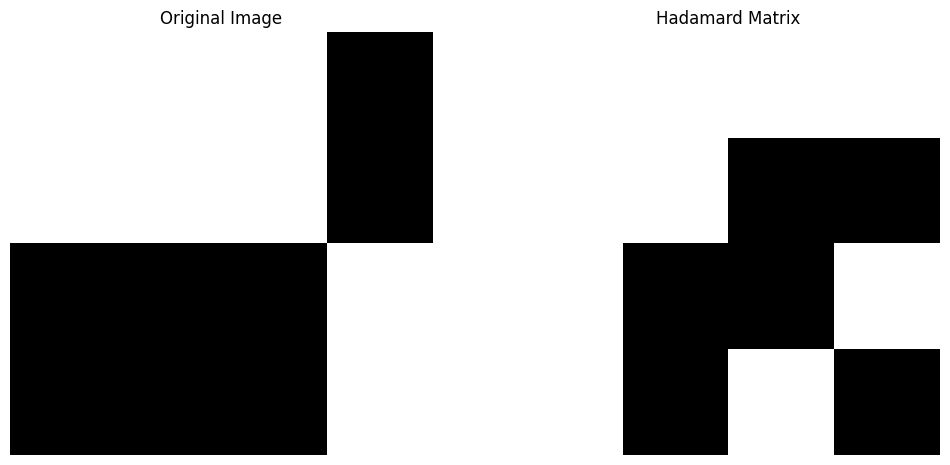

In [ ]:
plt.clf()
plt.figure(figsize=FIGSIZE)

plt.subplot(1, 2, 1)
plt.imshow(a*255, 'gray' )
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow((h+1)*40, 'gray' )
plt.title('Hadamard Matrix')
plt.axis('off')

plt.show()

In [ ]:
h

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1., -1., -1.],
       [ 1., -1., -1.,  1.],
       [ 1., -1.,  1., -1.]])

## Computing the Hadamard Transform
#### A = h * a * h
#### or  A = WHT(a)
#### Matrix multiplication,
#### WHT = Walsh Hadamard Transform, you may develop a function for that

In [ ]:
A = np.matmul(h , np.matmul(a , h))

<Figure size 640x480 with 0 Axes>

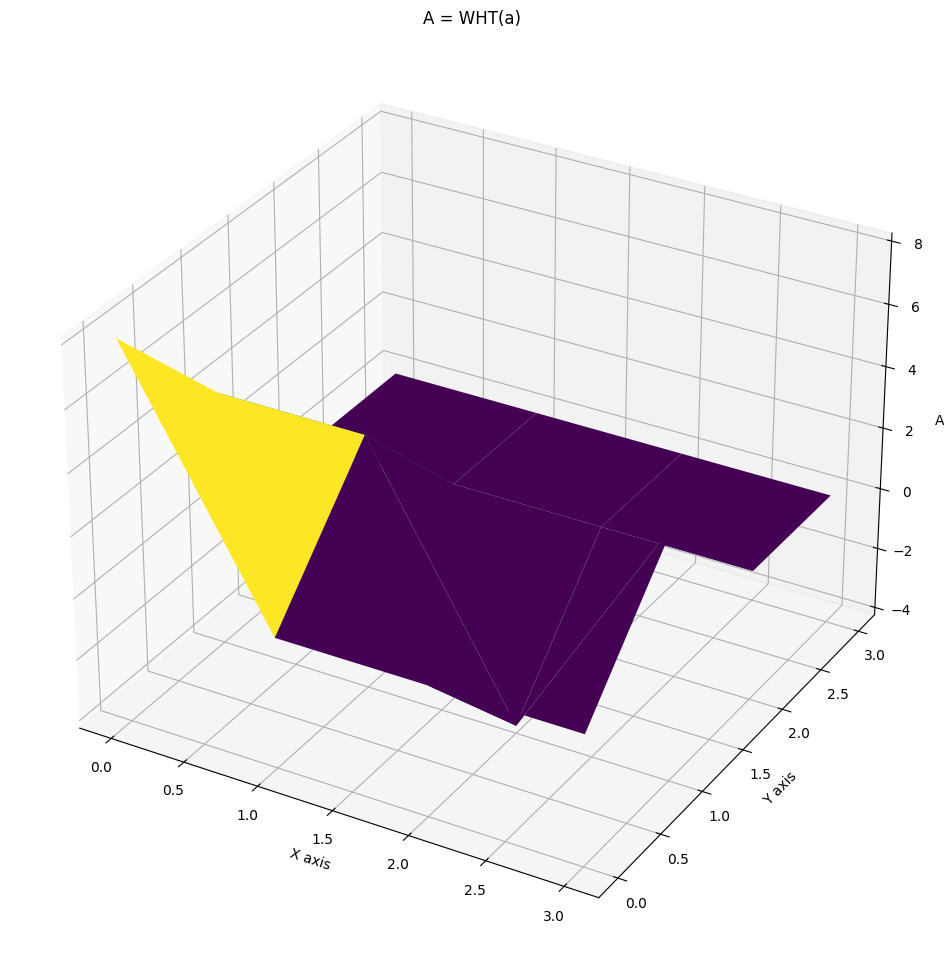

In [ ]:
# Create meshgrid to show the result of Hadamard transform = A
x = np.arange(SS[0])
y = np.arange(SS[0])
X, Y = np.meshgrid(x, y)

# Plotting
plt.clf()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, A, cmap='viridis')

# Labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('A')
ax.set_title('A = WHT(a)')

plt.show()

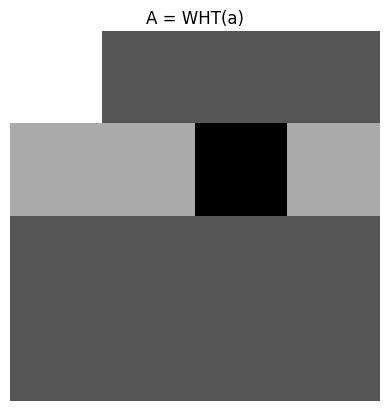

In [ ]:
plt.clf()
plt.imshow(A, 'gray' )
plt.title('A = WHT(a)')
plt.axis('off')
plt.show()

## Explanation

In [ ]:
print(A)

[[ 8.  0.  0.  0.]
 [ 4.  4. -4.  4.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [ ]:
print( np.sum( np.sum(a)) )
# This is the summation of all pixels of the image a
# What is the A[0,0] or the first element of A = WHT(a) ? again 8
# Each element of A shows the magnitude/amplitude of one of the basic 2d square wavelets
# contributed to building/composing a, the original image
# u and v are the vertical and horizontal frequencies of those 2d square wavelets
# using Sequence Ordered Hadamard matrices, those wavelets will be sorted by frequency, too.

8


<img src="ex2.bmp" />

In [ ]:
#### Another try, a new 4x4 image, a rather random one
#### Called a2

In [ ]:
a2 = np.array( [[36,12,36,12] , [40,76,40,76] , [36,12,36,12] , [1,19,1,19] ] )

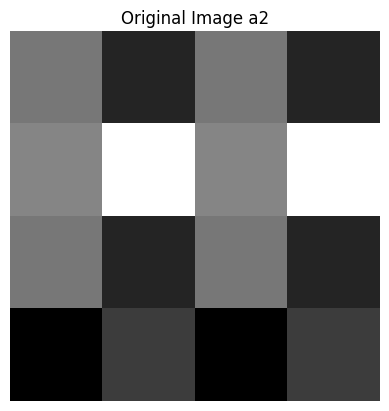

In [ ]:
plt.clf()
plt.imshow(a2, 'gray' )
plt.title('Original Image a2')
plt.axis('off')
plt.show()

In [ ]:
A2 = np.matmul(h , np.matmul(a2 , h))

In [ ]:
print(A2)
print('---------------')
print( np.sum(np.sum(a2)) )

[[ 464.    0.    0.  -12.]
 [ 192.    0.    0.  -36.]
 [-192.    0.    0.   36.]
 [ -80.    0.    0.  204.]]
---------------
464


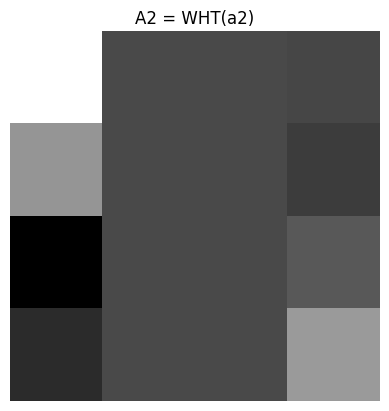

In [ ]:
plt.clf()
plt.imshow(A2, 'gray' )
plt.title('A2 = WHT(a2)')
plt.axis('off')
plt.show()

<img src="ex3.bmp" />

#### This time we use an 8x8 image, called m2
#### This is a random graylevel image

[[ 45  21  17 116  16  99  84  26]
 [ 39  99  82  24  77   8 114  86]
 [ 62  49  19  34   2 110  17  93]
 [117 117 108  60 104  77  73  21]
 [ 67  93 101  81  78  11  47  35]
 [ 17 113  76  57  76  84  33  63]
 [109  44  94  28 109  17  80  57]
 [ 60  23  66  37 110 107  29   7]]


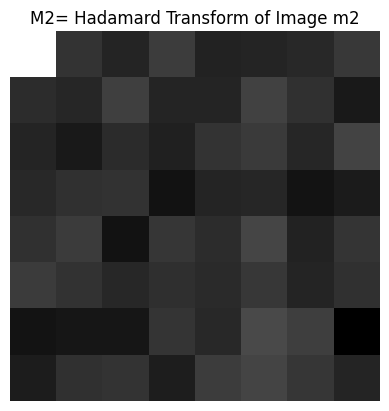

[[4025.  125. -145.  295. -199. -139.  -65.  231.]
 [   7. -121.  365. -159. -145.  423.   69. -359.]
 [-165. -369.  -23. -223.  123.  263. -119.  433.]
 [ -55.   97.  103. -493. -159. -127. -481. -325.]
 [  81.  285. -501.  179.   13.  473. -185.  151.]
 [ 291.  115.  -91.   49.  -33.  207. -143.   85.]
 [-489. -413. -423.  145.  -53.  567.  333. -851.]
 [-303.   73.  139. -289.  309.  445.  191. -165.]]


In [ ]:
m1= np.random.randint(0, 121, (8, 8))
print(m1)
h = sc.linalg.hadamard( 8 )
h = sordhad( h )
M1 = np.matmul(h , np.matmul(m1, h))

plt.clf()
plt.imshow(M1, 'gray' )
plt.title('M2= Hadamard Transform of Image m2')
plt.axis('off')
plt.show()
# cv.waitKey(0)
# cv.destroyAllWindows()
np.set_printoptions(suppress=True)
print(M1)

In [ ]:
print(h)

[[ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1. -1. -1. -1. -1.]
 [ 1.  1. -1. -1. -1. -1.  1.  1.]
 [ 1.  1. -1. -1.  1.  1. -1. -1.]
 [ 1. -1. -1.  1.  1. -1. -1.  1.]
 [ 1. -1. -1.  1. -1.  1.  1. -1.]
 [ 1. -1.  1. -1. -1.  1. -1.  1.]
 [ 1. -1.  1. -1.  1. -1.  1. -1.]]


<img src="The-basis.png" />

In [ ]:
### Now, back to a2,
#### we try to realize the way Hadamard transform decomposes the image
#### Transform a2 to A2, then
#### printing the image a2 and its Hadamard transform A2=WHT(a2)

In [ ]:
SS = a2.shape
h = sc.linalg.hadamard( SS[0] )
h = sordhad( h )
A2 = np.matmul(h , np.matmul(a2 , h))

In [ ]:
print('the image and its Hadamard transform: A2= h*a2*h= WHT(a2) ')
print(a2)
print(A2)

the image and its Hadamard transform: A2= h*a2*h= WHT(a2) 
[[36 12 36 12]
 [40 76 40 76]
 [36 12 36 12]
 [ 1 19  1 19]]
[[ 464.    0.    0.  -12.]
 [ 192.    0.    0.  -36.]
 [-192.    0.    0.   36.]
 [ -80.    0.    0.  204.]]


In [ ]:
# Building 4 square wave arrays, basic 1d wavelets.
# 2d wavelets that you can see in cells 14 and 20 above are in fact
# outer products of hi*hj for j in range(4)
#
h0 = np.array( [ [1, 1,  1,  1] ] )
h1 = np.array( [ [1, 1, -1, -1] ] )
h2 = np.array( [ [1, -1, -1, 1] ] )
h3 = np.array( [ [1, -1, 1, -1] ] )
print(h)

[[ 1.  1.  1.  1.]
 [ 1.  1. -1. -1.]
 [ 1. -1. -1.  1.]
 [ 1. -1.  1. -1.]]


#### What can you say about the results of cells below?
#### What do they show and suggest?
#### Hint: Are the results some elements of A2? How? Where?

In [ ]:
print(A2)

[[ 464.    0.    0.  -12.]
 [ 192.    0.    0.  -36.]
 [-192.    0.    0.   36.]
 [ -80.    0.    0.  204.]]


In [ ]:
print ( np.matmul( np.matmul(h0,a2) , h0.T) )

[[464]]


In [ ]:
print ( np.matmul( np.matmul(h0,a2) , h1.T) )

[[0]]


In [ ]:
print ( np.matmul( np.matmul(h1,a2) , h0.T) )

[[192]]


In [ ]:
print ( np.matmul( np.matmul(h3,a2) , h0.T) )

[[-80]]


In [ ]:
print ( np.matmul( np.matmul(h3,a2) , h3.T) )

[[204]]


#### Declaration of a function to decompose any square $2^n \times 2^n$ image into
#### its 2d squarewave wavelets using Hadamard transform
#### input: a, the image, $N \times N$, where $N = 2^n$
#### outputs: alst and Alst, 2 $N \times N \times N^2$ matrices
#### each page of Alst is one of
#### each page of alst, e.g., alst[:,:,i] is the result of inverse
#### Hadamard transform of Alst[:,:,i]
#### in codes S= size of the image = N in this comment

In [ ]:
def had_decomposer(a):
    S = a.shape[0]
    h = sc.linalg.hadamard( S )
    h = sordhad( h )
    # Hadamard transform
    A = np.matmul(h , np.matmul(a , h))
    # saving the image and its transform for later
    A2 = A
    a2 = a
    Alst=[]
    alst=[]
    # In these 2 nested loops, we make a mask of all zeros but one 1
    # and multiply that with the Hadamard transform of the image, A
    # to keep just 1 frequency element and make all others 0
    # before doing the inverse transform.
    for i in range(S):
        for j in range(S):
            msk = np.zeros( (S,S) )
            msk[i,j]=1
            A = A * msk
            a =  np.matmul(h , np.matmul(A , h)) / S**2
            alst.append(a)
            Alst.append(A)
            A=A2

    # convering lists to 3d numpy matrices of SxSxS**2 size
    alst = np.stack(alst , axis=-1)
    Alst = np.stack(Alst , axis=-1)

    return alst , Alst


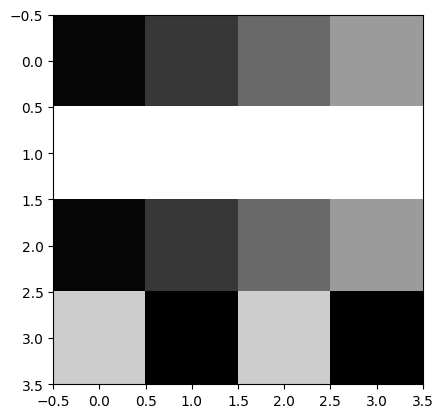

In [ ]:
# now c is our 4x4 image, we call had_decoposer and compute its components
# saved in clst and CLST
c = np.array( [ [10,20,30,40] , [60,60,60,60] , [10,20,30,40] , [50,9,50,9] ] )
plt.clf()
plt.imshow(c, cmap='gray')
plt.show()

S= c.shape[0]
clst , CLST = had_decomposer(c)

In [ ]:
print( type(clst) , clst.shape)

<class 'numpy.ndarray'> (4, 4, 16)
16


In [ ]:
# print all the pages of clst, which are results of the decomposition of c into all its 16 2d squarewave
# components in spatial domian
for i in range(S**2):
    print( clst[:,:,i] )

[[34.875 34.875 34.875 34.875]
 [34.875 34.875 34.875 34.875]
 [34.875 34.875 34.875 34.875]
 [34.875 34.875 34.875 34.875]]
[[-5. -5.  5.  5.]
 [-5. -5.  5.  5.]
 [-5. -5.  5.  5.]
 [-5. -5.  5.  5.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 2.625 -2.625  2.625 -2.625]
 [ 2.625 -2.625  2.625 -2.625]
 [ 2.625 -2.625  2.625 -2.625]
 [ 2.625 -2.625  2.625 -2.625]]
[[ 7.625  7.625  7.625  7.625]
 [ 7.625  7.625  7.625  7.625]
 [-7.625 -7.625 -7.625 -7.625]
 [-7.625 -7.625 -7.625 -7.625]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[-5.125  5.125 -5.125  5.125]
 [-5.125  5.125 -5.125  5.125]
 [ 5.125 -5.125  5.125 -5.125]
 [ 5.125 -5.125  5.125 -5.125]]
[[-7.625 -7.625 -7.625 -7.625]
 [ 7.625  7.625  7.625  7.625]
 [ 7.625  7.625  7.625  7.625]
 [-7.625 -7.625 -7.625 -7.625]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0

In [ ]:
# print all the pages of CLST, which show magnitude and position (horizontal and vertical frequency)
# of 2d square wavelets involved in making c
for i in range(S**2):
    print( CLST[:,:,i] )

[[558.  -0.   0.   0.]
 [  0.   0.   0.  -0.]
 [ -0.   0.   0.   0.]
 [ -0.  -0.   0.  -0.]]
[[  0. -80.   0.   0.]
 [  0.   0.   0.  -0.]
 [ -0.   0.   0.   0.]
 [ -0.  -0.   0.  -0.]]
[[ 0. -0.  0.  0.]
 [ 0.  0.  0. -0.]
 [-0.  0.  0.  0.]
 [-0. -0.  0. -0.]]
[[ 0. -0.  0. 42.]
 [ 0.  0.  0. -0.]
 [-0.  0.  0.  0.]
 [-0. -0.  0. -0.]]
[[  0.  -0.   0.   0.]
 [122.   0.   0.  -0.]
 [ -0.   0.   0.   0.]
 [ -0.  -0.   0.  -0.]]
[[ 0. -0.  0.  0.]
 [ 0.  0.  0. -0.]
 [-0.  0.  0.  0.]
 [-0. -0.  0. -0.]]
[[ 0. -0.  0.  0.]
 [ 0.  0.  0. -0.]
 [-0.  0.  0.  0.]
 [-0. -0.  0. -0.]]
[[  0.  -0.   0.   0.]
 [  0.   0.   0. -82.]
 [ -0.   0.   0.   0.]
 [ -0.  -0.   0.  -0.]]
[[   0.   -0.    0.    0.]
 [   0.    0.    0.   -0.]
 [-122.    0.    0.    0.]
 [  -0.   -0.    0.   -0.]]
[[ 0. -0.  0.  0.]
 [ 0.  0.  0. -0.]
 [-0.  0.  0.  0.]
 [-0. -0.  0. -0.]]
[[ 0. -0.  0.  0.]
 [ 0.  0.  0. -0.]
 [-0.  0.  0.  0.]
 [-0. -0.  0. -0.]]
[[ 0. -0.  0.  0.]
 [ 0.  0.  0. -0.]
 [-0.  0.  0. 82.]


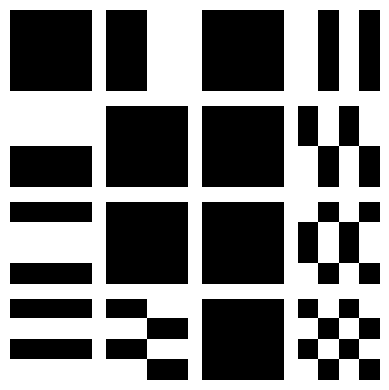

In [ ]:
# showing different pages of clst
fig, axes = plt.subplots(nrows=S, ncols=S, figsize=(S,S))

# Flatten the array of axes for easy iteration
axes = axes.ravel()

# Display each image in the corresponding subplot
for i in range(S**2):
    norm = plt.Normalize(vmin=np.min(clst[:,:,i]), vmax=np.max(clst[:,:,i]))
    axes[i].imshow(clst[:,:,i], cmap='gray', interpolation='nearest')
    axes[i].axis('off')  # Hide the axes

# Adjust layout and display the grid
plt.tight_layout()
plt.show()

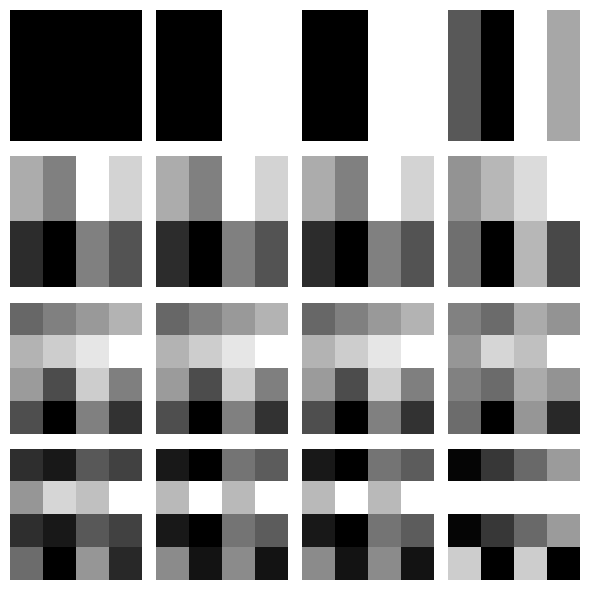

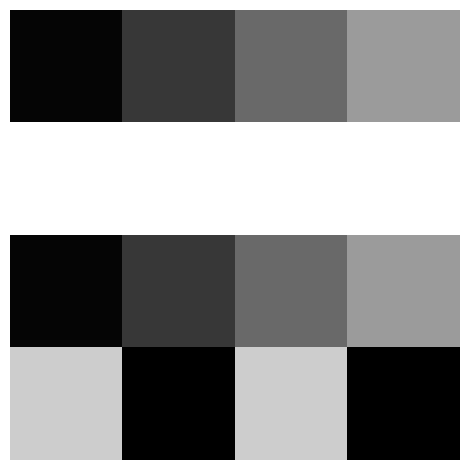

In [ ]:
# cumulative recomposition of c by adding all the pages of clst together
# we show the final result once again in larger size at the end
fig, axes = plt.subplots(S, S, figsize=(6, 6))

# Plot each image
accom = np.zeros((S,S))
for i, ax in enumerate(axes.flat):
    accom += clst[:,:,i]
    ax.imshow(accom, cmap='gray')  # Show image in grayscale
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

# Flatten the array of axes for easy iteration
# Adjust layout and display the grid
norm = plt.Normalize(vmin=np.min(accom), vmax=np.max(accom))
plt.imshow(accom, cmap='gray', norm=norm, interpolation='nearest')
plt.axis('off')  # Hide the axes
plt.tight_layout()
plt.show()

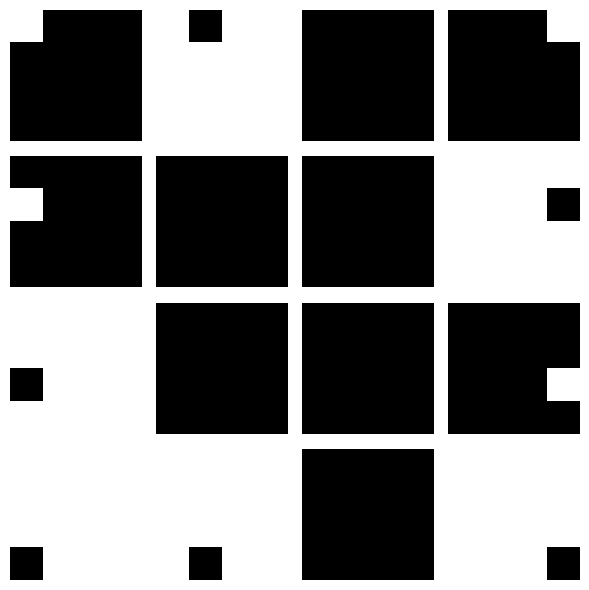

In [ ]:
# Trivia: visualization of different pages of CLST
fig, axes = plt.subplots(S, S, figsize=(6, 6))

# Plot each image
for i, ax in enumerate(axes.flat):
    ax.imshow(CLST[:,:,i], cmap='gray')  # Show image in grayscale
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()